# **Sparse Vector (Embedding)**

**1. Importing Required Libraries**

We start by importing essential Python libraries for data manipulation, visualization, and NLP.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import nltk
from wordcloud import WordCloud
import spacy

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**2. Load and Explore the Dataset**

We load the dataset and check its structure to understand the data we are working with.

In [6]:
# Load the dataset (replace 'social_media_data.csv' with your actual file path)
df = pd.read_csv('/content/synthetic_social_media_data.csv')


In [3]:
# Display the first few rows of the dataset
print(df.head())

                                Post ID  \
0  aa391375-7355-44b7-bcbf-97fb4e5a2ba3   
1  1c9ec98d-437a-48d9-9cba-bd5ad853c59a   
2  170e5b5b-1d9a-4d02-a957-93c4dbb18908   
3  aec53496-60ee-4a06-8821-093a04dc8770   
4  4eacddb7-990d-4056-8784-7e1d5c4d1404   

                                        Post Content Sentiment Label  \
0  Word who nor center everything better politica...         Neutral   
1  Begin administration population good president...        Positive   
2  Thousand total sign. Agree product relationshi...        Positive   
3  Individual from news third. Oil forget them di...         Neutral   
4  Time adult letter see reduce. Attention sudden...        Negative   

   Number of Likes  Number of Shares  Number of Comments  User Follower Count  \
0              157               243                  64                 4921   
1              166                49                 121                  612   
2              185               224                 179         

In [4]:
# Check the column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Post ID              2000 non-null   object
 1   Post Content         2000 non-null   object
 2   Sentiment Label      2000 non-null   object
 3   Number of Likes      2000 non-null   int64 
 4   Number of Shares     2000 non-null   int64 
 5   Number of Comments   2000 non-null   int64 
 6   User Follower Count  2000 non-null   int64 
 7   Post Date and Time   2000 non-null   object
 8   Post Type            2000 non-null   object
 9   Language             2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 156.4+ KB
None


In [5]:
# Check for any missing values
print(df.isnull().sum())

Post ID                0
Post Content           0
Sentiment Label        0
Number of Likes        0
Number of Shares       0
Number of Comments     0
User Follower Count    0
Post Date and Time     0
Post Type              0
Language               0
dtype: int64


**3. Data Preprocessing**

Since the dataset includes a "Post Content" column, we preprocess the text by converting it to lowercase, removing punctuation, and cleaning it for further analysis.

In [7]:
# Basic Text Cleaning: Lowercase conversion, removing punctuation, and handling missing values
df['Post Content'] = df['Post Content'].fillna('').str.lower()
df['Post Content'] = df['Post Content'].str.replace('[^a-z\s]', '', regex=True)


In [8]:
# Display a sample of the cleaned text
print(df['Post Content'].head())

0    word who nor center everything better politica...
1    begin administration population good president...
2    thousand total sign agree product relationship...
3    individual from news third oil forget them dif...
4    time adult letter see reduce attention suddenl...
Name: Post Content, dtype: object


**4. TF-IDF Calculation**

Here, we compute the Term Frequency-Inverse Document Frequency (TF-IDF) for specific words like "car", "auto", "insurance", and "best" in the "Post Content" column.

In [9]:
# Define the query terms for TF-IDF
query_terms = ['car', 'auto', 'insurance', 'best']


In [10]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(vocabulary=query_terms)


In [11]:
# Compute the TF-IDF matrix for 'Post Content'
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Post Content'])


In [12]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=query_terms)


In [13]:
# Display the TF-IDF weights
print("TF-IDF Weights for Terms:")
print(tfidf_df.head())

TF-IDF Weights for Terms:
   car  auto  insurance  best
0  0.0   0.0        0.0   0.0
1  0.0   0.0        0.0   0.0
2  0.0   0.0        0.0   0.0
3  0.0   0.0        0.0   0.0
4  0.0   0.0        0.0   0.0


**5. Euclidean Normalization**

After calculating the term frequencies, we normalize the values using Euclidean normalization to standardize the term frequencies.

In [14]:
# Apply Euclidean normalization to the TF-IDF values
tfidf_normalized = normalize(tfidf_df, norm='l2', axis=1)


In [15]:
# Convert normalized values back to DataFrame
tfidf_normalized_df = pd.DataFrame(tfidf_normalized, columns=query_terms)


In [16]:
# Display normalized TF-IDF weights
print("Normalized TF-IDF Weights:")
print(tfidf_normalized_df.head())

Normalized TF-IDF Weights:
   car  auto  insurance  best
0  0.0   0.0        0.0   0.0
1  0.0   0.0        0.0   0.0
2  0.0   0.0        0.0   0.0
3  0.0   0.0        0.0   0.0
4  0.0   0.0        0.0   0.0


**6. Cosine Similarity**

We now compute the Cosine Similarity between different documents to identify the similarity between the terms.



In [24]:
# Compute Cosine Similarity between the terms in the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix)


In [25]:
# Create dynamic labels for each document
doc_labels = [f'Doc{i+1}' for i in range(tfidf_matrix.shape[0])]

# Convert the cosine similarity matrix to DataFrame for all documents
cosine_sim_df = pd.DataFrame(cosine_sim, columns=doc_labels, index=doc_labels)

# Display the cosine similarity matrix
print(cosine_sim_df.head())


      Doc1  Doc2  Doc3  Doc4  Doc5  Doc6  Doc7  Doc8  Doc9  Doc10  ...  \
Doc1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
Doc2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
Doc3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
Doc4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   
Doc5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0  ...   

      Doc1991  Doc1992  Doc1993  Doc1994  Doc1995  Doc1996  Doc1997  Doc1998  \
Doc1      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Doc2      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Doc3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Doc4      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
Doc5      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      Doc1999  Doc2000  
Doc1      0.0      0.0  
Doc2      0.0      0.0  

**7. Word Embeddings Using SpaCy**

To generate a word embedding for each term, we use SpaCy, a popular NLP library. Word embeddings capture the semantic similarity between words.



In [26]:
# Example words to create embeddings for: 'car', 'auto', 'insurance', 'best'
words = ['car', 'auto', 'insurance', 'best']

In [27]:
# Create word embeddings using SpaCy
word_embeddings = {word: nlp(word).vector for word in words}


In [28]:
# Display the word embeddings
for word, vector in word_embeddings.items():
    print(f"Word: {word}, Embedding Vector: {vector[:10]}...")  # Print only first 10 dimensions

Word: car, Embedding Vector: [-1.3696824  -0.38167214 -0.914183    0.10742364 -0.246116   -0.01996091
  0.77010477  1.7142854  -0.09008784 -0.26209286]...
Word: auto, Embedding Vector: [-1.4267825  -0.73297024 -0.3350294   0.2729452  -0.555292   -0.30753097
  0.00742118  0.8350202  -0.19625245 -1.1181103 ]...
Word: insurance, Embedding Vector: [-1.5398034  -0.34571    -0.97388935 -0.02272844 -0.05953687 -0.43266296
  0.8289215   1.2402549  -0.1720698  -0.69831073]...
Word: best, Embedding Vector: [-1.0370533  -1.3944091  -0.8029588  -1.8264171  -0.4620498   0.03546381
  0.7953415   1.7667754  -0.4339797   0.00565182]...


**8. Plotting Word Embeddings**

We plot the word embeddings to visually understand the relationship between terms like "car" and "auto" (which are semantically similar).

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [30]:
# Reduce the dimensions of the word embeddings for 2D plotting
pca = PCA(n_components=2)
word_vectors = np.array([vector for vector in word_embeddings.values()])
word_vectors_2d = pca.fit_transform(word_vectors)


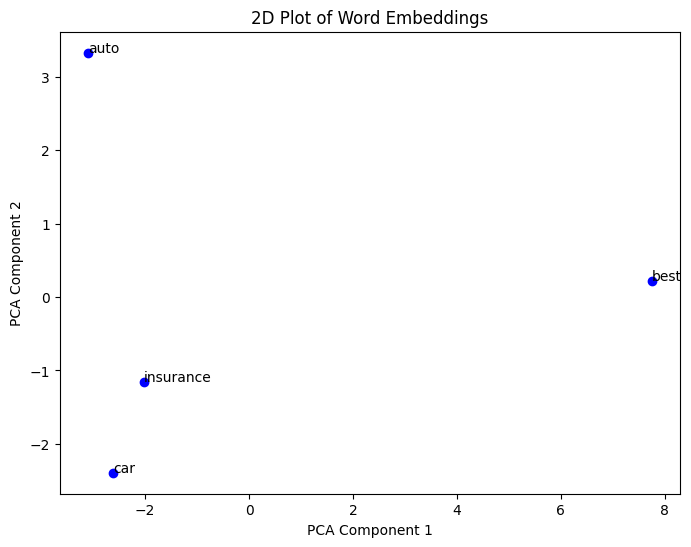

In [31]:
# Plot the word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color='blue')

# Annotate the plot with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('2D Plot of Word Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**9. Finding Nearest Neighbors Using Cosine Similarity**

Now we calculate the nearest neighbors of a word based on cosine similarity, showing how close words like "car" and "auto" are in the vector space.

In [34]:
# Function to find the nearest word using cosine similarity
def nearest_word(word, word_embeddings):
    word_vec = word_embeddings[word]
    nearest = None
    max_similarity = -1

    # Compare with every other word
    for other_word, other_vec in word_embeddings.items():
        if word != other_word:
            # Calculate cosine similarity
            similarity = cosine_similarity([word_vec], [other_vec])[0][0]
            if similarity > max_similarity:
                max_similarity = similarity
                nearest = other_word
    return nearest, max_similarity


In [35]:
# Example word list
words = ['car', 'auto', 'insurance', 'best']

# Create word embeddings using SpaCy
word_embeddings = {word: nlp(word).vector for word in words}


In [36]:
# Find the nearest word to 'car'
nearest, similarity = nearest_word('car', word_embeddings)

# Print the result
print(f"The nearest word to 'car' is '{nearest}' with cosine similarity {similarity:.4f}")


The nearest word to 'car' is 'insurance' with cosine similarity 0.7074


**10. Pointwise Mutual Information (PMI)**

We use PMI to measure how often words co-occur in a dataset, especially when low-frequency words appear together.

In [37]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Tokenize the 'Post Content' for PMI calculations
tokens = [nltk.word_tokenize(content) for content in df['Post Content']]
tokens_flat = [token for sublist in tokens for token in sublist]

# Compute PMI for word pairs using NLTK's BigramCollocationFinder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_flat)

# Find top word pairs based on PMI
pmi_bigrams = finder.nbest(bigram_measures.pmi, 10)
print("Top 10 Word Pairs by PMI:")
print(pmi_bigrams)


Top 10 Word Pairs by PMI:
[('reduce', 'finally'), ('performance', 'point'), ('defense', 'this'), ('account', 'hospital'), ('determine', 'debate'), ('candidate', 'keep'), ('travel', 'a'), ('still', 'floor'), ('similar', 'court'), ('court', 'too')]


### **Conclusion**
This code performs several tasks, including:
1. **TF-IDF** calculation to compute term importance.
2. **Cosine Similarity** to measure similarity between terms and documents.
3. **Word Embeddings** to capture semantic meaning in the vector space.
4. **Nearest Neighbors** to find similar words using cosine similarity.
5. **PMI** to analyze word co-occurrence.

This approach provides insights into how social media content can be analyzed to uncover patterns, similarities, and relationships between key terms.